# Step 4. Exploratory data analysis (Python)
In addition to the data you retrieved in the previous tasks, you've been given a second file. You now have these two CSVs:<br>
**project_sql_result_01.csv** . It contains the following data:
- company_name: taxi company name
- trips_amount: the number of rides for each taxi company on November 15-16, 2017. <br><br>
**project_sql_result_04.csv** . It contains the following data: <br>
- dropoff_location_name: Chicago neighborhoods where rides ended
- average_trips: the average number of rides that ended in each neighborhood in November 2017.

# For these two datasets you now need to:
- import the files (DONE)
- study the data they contain (DONE)
- make sure the data types are correct (DONE)
- identify the top 10 neighborhoods in terms of drop-offs (DONE)
- make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs
- draw conclusions based on each graph and explain the results

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# import files
df_company_trip = pd.read_csv('C:/ML/05.SQL_Project/datasets/project_sql_result_01.csv')
df_dropoffarea_trip_Nov = pd.read_csv('C:/ML/05.SQL_Project/datasets/project_sql_result_04.csv')
df_query_loop_ohera = pd.read_csv('C:/ML/05.SQL_Project/datasets/project_sql_result_07.csv')

#### check the 1st dataset *df_company_trip* (project_sql_result_01)

In [3]:
df_company_trip.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
# OK. There are 2 columns 'company_name' and 'trips_amount'

In [5]:
df_company_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [6]:
# OK. There are 64 non-null rows; types of data are correct (int and text)

In [7]:
len(df_company_trip.company_name.unique())

64

In [8]:
# OK. Names of neighborhoods are unique, there are no duplicates.

In [9]:
df_company_trip.trips_amount.values

array([19558, 11422, 10367,  9888,  9299,  9181,  8448,  7701,  7455,
        5953,  5015,  4383,  3355,  3175,  2235,  2216,  2070,  1955,
        1775,  1607,  1486,  1404,  1296,  1259,  1014,   978,   428,
         402,   310,   250,   230,   210,   147,   146,   127,    39,
          37,    36,    33,    33,    31,    29,    29,    29,    27,
          25,    21,    21,    20,    16,    15,    15,    14,    14,
          14,    13,    12,    11,     8,     7,     7,     5,     3,
           2], dtype=int64)

In [10]:
# OK. Number of trips are in descending order

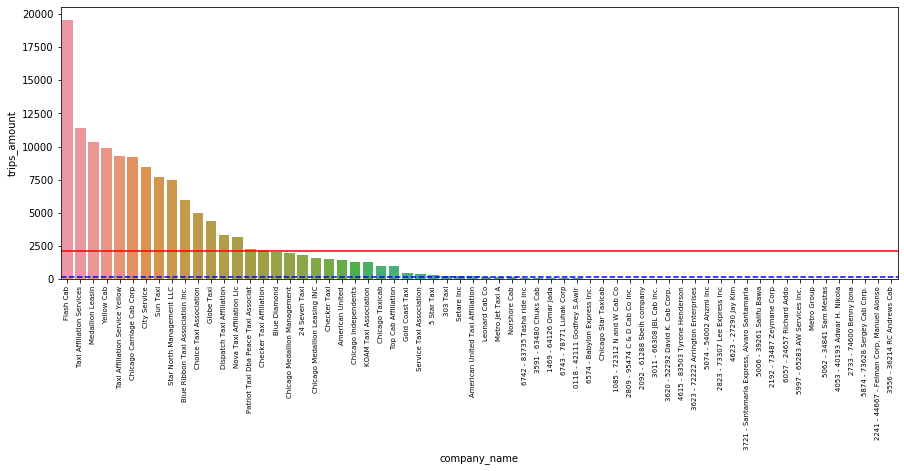

In [46]:
plt.figure(figsize=(15,5))
sns.barplot(x=df_company_trip['company_name'], y=df_company_trip['trips_amount'])
plt.xticks(fontsize=7,rotation=90)
plt.axhline((df_company_trip['trips_amount'].mean()), color='r', linestyle='-')
plt.axhline((df_company_trip['trips_amount'].median()), color='b', linestyle='--')

In [66]:
print('The first 6th companies have ',df_company_trip['trips_amount'][0:6].sum(),
      'trips > ',df_company_trip['trips_amount'].sum() / 2,'half of trips of all companies')

The first 6th companies have  69715 trips >  68655.5 half of trips of all companies


#### Notice 01
1) Flash Cab is the leader beside of all companies (close to have a twice number of trips comparing to his competitors)
2) The first 6th companies have 69715 trips, that is great than half of number of trips of all companies 68655.

#### check the 2nd dataset *df_dropoffarea_trip_Nov* (project_sql_result_04)

In [11]:
# next dataframe
df_dropoffarea_trip_Nov.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [12]:
# OK. There are 2 columns 'dropoff_location_name' and 'average_trips'

In [13]:
df_dropoffarea_trip_Nov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [14]:
# OK. There are 94 non-null rows; types of data are correct (int and float). Mean value could be a float number.

In [15]:
len(df_dropoffarea_trip_Nov.dropoff_location_name.unique())

94

In [16]:
# OK. Names of neighborhoods are unique, there are no duplicates.

In [17]:
len(df_dropoffarea_trip_Nov.query('average_trips>=0'))

94

In [18]:
# OK. Mean values are positive.

In [19]:
# top-10
# sorting in descending order just in case
# select the first 10 rows
top10 = df_dropoffarea_trip_Nov.sort_values('average_trips',ascending=False).head(10)
top10

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


#### check the 3rd dataset *df_query_loop_ohera* (project_sql_result_07)

In [20]:
df_query_loop_ohera.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [21]:
# one can see that duration_seconds should be integer not real
df_query_loop_ohera['duration_seconds'] = df_query_loop_ohera['duration_seconds'].astype(int)

In [22]:
df_query_loop_ohera.weather_conditions.unique()
# nothing extra OK

array(['Good', 'Bad'], dtype=object)

#### PLOT

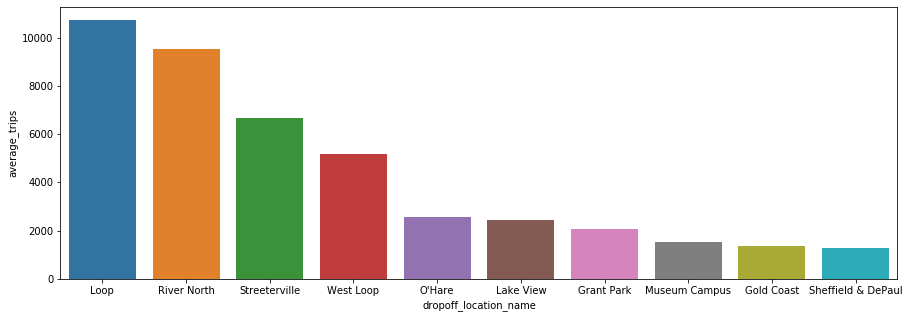

In [31]:
plt.figure(figsize=(15,5))
sns.barplot(x=top10['dropoff_location_name'], y=top10['average_trips'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EC097A4748>]],
      dtype=object)

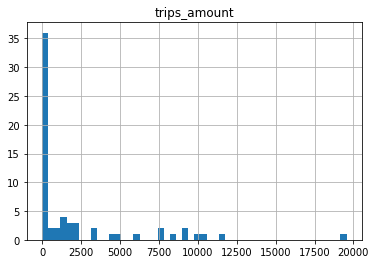

In [27]:
# plot graphs: taxi companies and number of rides
df_company_trip.hist('trips_amount', bins=50) #, range=[0,1500]

##### Notice_02
As expected most of the companies has a little number of rides <400

# hypothesis
Test the hypothesis:
"The average duration of rides from Loop neighborhood to O'Hare
International Airport changes on rainy Sundays."

In [73]:
df_query_loop_ohera

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440
...,...,...,...
1063,2017-11-25 11:00:00,Good,0
1064,2017-11-11 10:00:00,Good,1318
1065,2017-11-11 13:00:00,Good,2100
1066,2017-11-11 08:00:00,Good,1380


In [80]:
# I want check if there not Saturdays
df_query_loop_ohera['day_of_week'] = pd.to_datetime(df_query_loop_ohera['start_ts']).dt.dayofweek
df_query_loop_ohera['day_of_week'].unique()

array([5], dtype=int64)

It is OK.

In [90]:
df_sunny = df_query_loop_ohera.query('weather_conditions == "Good"')
df_rainy = df_query_loop_ohera.query('weather_conditions == "Bad"')

In [100]:
df_sunny.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 1066
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   start_ts            888 non-null    object
 1   weather_conditions  888 non-null    object
 2   duration_seconds    888 non-null    int32 
 3   day_of_week         888 non-null    int64 
dtypes: int32(1), int64(1), object(2)
memory usage: 31.2+ KB


In [101]:
df_rainy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 6 to 1067
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   start_ts            180 non-null    object
 1   weather_conditions  180 non-null    object
 2   duration_seconds    180 non-null    int32 
 3   day_of_week         180 non-null    int64 
dtypes: int32(1), int64(1), object(2)
memory usage: 6.3+ KB


In [114]:
print('We have only',len(df_rainy),'bad days in comparison with',len(df_sunny),'of good days')
print('But it is still enough to test hypothesis.')
print('There is no any good reason to put the same variance for these two sets. They could be different.')
print('But in fact it doesn''t influence to the result.')

We have only 180 bad days in comparison with 888 of good days
But it is still enough to test hypothesis.
There is no any good reason to put the same variance for these two sets. They could be different.
But in fact it doesnt influence to the result.


In [115]:
alpha = .05
results = st.ttest_ind(
        df_sunny.duration_seconds, 
        df_rainy.duration_seconds,
        equal_var=False)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis") 

p-value:  6.738994326108734e-12
We reject the null hypothesis


In [99]:
print('Good is (mean duration)',df_sunny.duration_seconds.mean())
print('Bad is (mean duration)',df_rainy.duration_seconds.mean())

Good is (mean duration) 1999.6756756756756
Bad is (mean duration) 2427.2055555555557


Null hypothesis: means of the two statistical populations (bad or good weather) are equal based on samples taken from them
We reject the null hypothesis, so they are not equal.
P-value extremely low, so we could be very confident.

# How will my project be evaluated?
Here are the project assessment criteria. Read them over carefully before you
get to work.
Here’s what the project reviewer will look for when assessing your project:
- how you retrieve data from the website
- how you make data slices
- how you group data
- whether you use the the right methods for joining tables
- how you formulate hypotheses
- what criteria you use to test the hypotheses and why
- what conclusions you reach
- whether you leave comments at each step